# Polynomial Regression

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#importing packages, undearstand data and read">Underastanding and Reading Data</a></li>
        <li><a href="#Exploratory Data Analysis">EDA</a></li>
        <li><a href="#Training data">Training Data</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#Reference">References</a></li>
    </ol>
</div>
<br>
<hr>


### Importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding the Data

### `CarPrice_Assignment.csv`:

We have downloaded a car price prediction dataset, **`CarPrice_Assignment.csv`** from Kaggle. [Dataset source]https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv)

*   **symboling** e.g. 3
*   **CarName** e.g. alfa-romero giulia	
*   **fueltype** e.g. gas
*   **aspiration** e.g. std
*   **doornumber** e.g.two
*   **drivewheel** e.g rwd
*   **enginelocation** e.g. front
*   **carlength** e.g. 168.8
*   **carwidth** e.g. 64.1
*   **carheight** e.g. 48.8
*   **curbweight** e.g. 2548
*   **enginetype** e.g. dohc
*   **cylindernumber** e.g. four
*   **enginesize** e.g. 130
*   **fuelsystem** e.g. mpfi
*   **boreratio**  e.g. 3.47
*   **stroke** e.g. 2.68
*   **compressionratio** e.g.9.0
*   **horsepower**	e.g.111
*   **peakrpm**  e.g. 5000 revolutions per minute
*   **citympg**	e.g. 21 miles per gallon
*   **highwaympg**  e.g. 27 miles per gallon
*   **price** e.g 13495.0 dollars

## Reading the data


In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

# take a look at the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [7]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Heat map
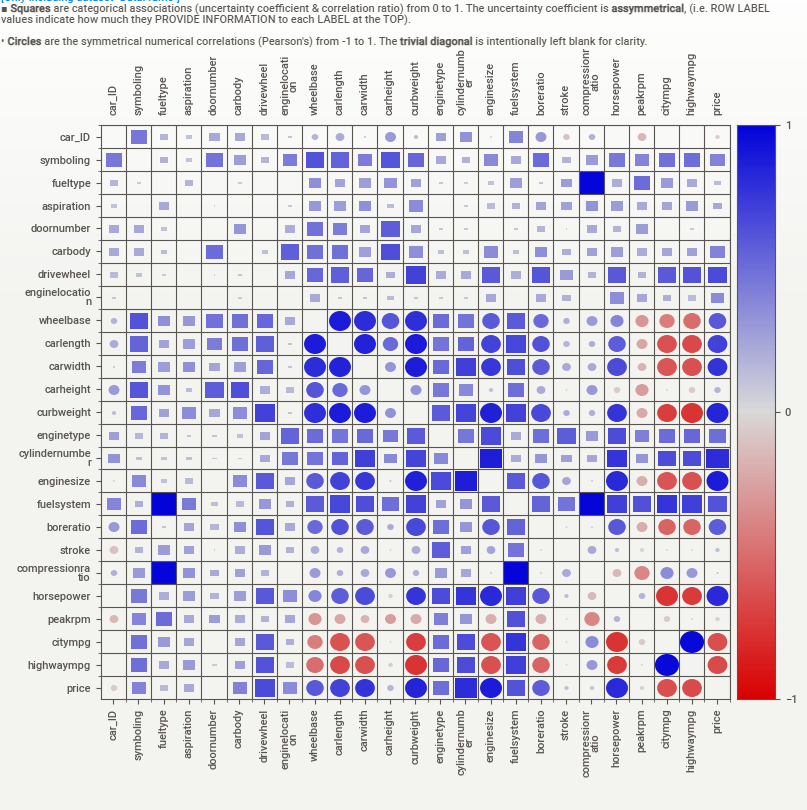

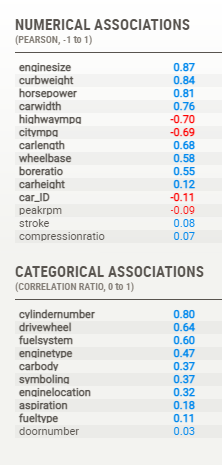

Let's select some features that we want to use for regression.


In [17]:
sdf = df[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber','highwaympg', 'citympg', 'price']]
sdf.head(10)

,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,citympg,price
0,130,2548,111,64.1,four,27,21,13495.000
1,130,2548,111,64.1,four,27,21,16500.000
2,152,2823,154,65.5,six,26,19,16500.000
3,109,2337,102,66.2,four,30,24,13950.000
4,136,2824,115,66.4,five,22,18,17450.000
5,136,2507,110,66.3,five,25,19,15250.000
6,136,2844,110,71.4,five,25,19,17710.000
7,136,2954,110,71.4,five,25,19,18920.000
8,131,3086,140,71.4,five,20,17,23875.000
9,131,3053,160,67.9,five,22,16,17859.167


Let's plot Emission values with respect to Engine size:


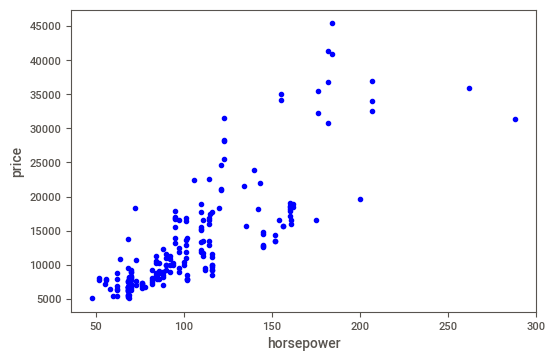

In [18]:
plt.scatter(sdf.horsepower, sdf.price,  color='blue')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

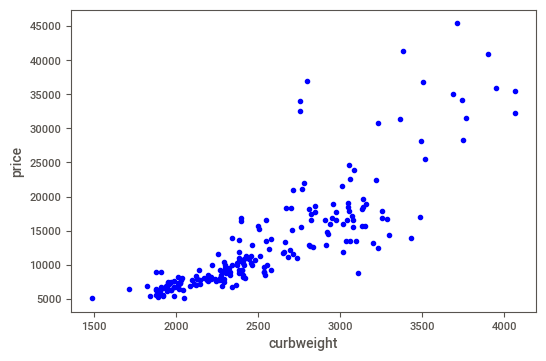

In [19]:
plt.scatter(sdf.curbweight, sdf.price,  color='blue')
plt.xlabel("curbweight")
plt.ylabel("price")
plt.show()

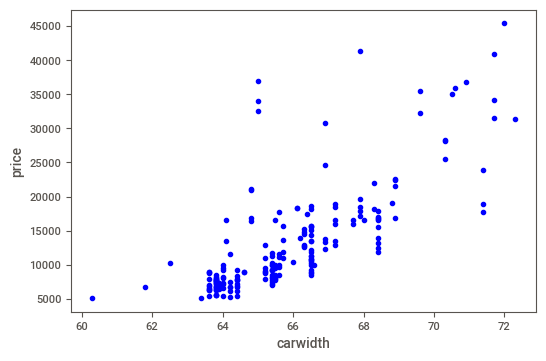

In [20]:
plt.scatter(sdf.carwidth, sdf.price,  color='blue')
plt.xlabel("carwidth")
plt.ylabel("price")
plt.show()

# Training data

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['price']])

test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 1.1100e+02, 1.2321e+04],
       [1.0000e+00, 1.1100e+02, 1.2321e+04],
       [1.0000e+00, 1.5400e+02, 2.3716e+04],
       [1.0000e+00, 1.1500e+02, 1.3225e+04],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 1.6000e+02, 2.5600e+04],
       [1.0000e+00, 1.0100e+02, 1.0201e+04],
       [1.0000e+00, 1.2100e+02, 1.4641e+04],
       [1.0000e+00, 1.2100e+02, 1.4641e+04],
       [1.0000e+00, 1.2100e+02, 1.4641e+04],
       [1.0000e+00, 1.8200e+02, 3.3124e+04],
       [1.0000e+00, 1.8200e+02, 3.3124e+04],
       [1.0000e+00, 1.8200e+02, 3.3124e+04],
       [1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 7.0000e+01, 4.9000e+03],
       [1.0000e+00, 6.8000e+01, 4.6240e+03],
       [1.0000e+00, 6.8000e+01, 4.6240e+03],
       [1.0000e+00, 1.0200e+02, 1.0404e+04],
       [1.0000e+00, 6.8000e+01, 4.6240e+03],
       [1.0000e+00, 6.8000e+01, 4.6240e+03],
       [1.0000e+00, 6.8000e+01, 4.6240e+03],
       [1.

In [21]:
pr = linear_model.LinearRegression()
train_y_ = pr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', pr.coef_)
print ('Intercept: ',pr.intercept_)

Coefficients:  [[ 0.00000000e+00  1.93039588e+02 -1.34613385e-01]]
Intercept:  [-5159.9428631]


Text(0, 0.5, 'price')

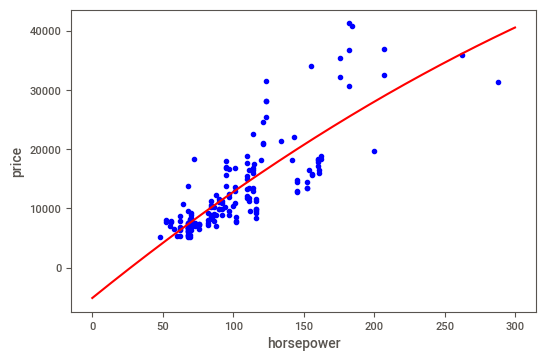

In [22]:
plt.scatter(train.horsepower, train.price,  color='blue')
XX = np.arange(0.0, 300, 0.1)
yy = pr.intercept_[0]+ pr.coef_[0][1]*XX+ pr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("horsepower")
plt.ylabel("price")

<h2 id="evaluation">Evaluation</h2>


In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = pr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 3768.09
Residual sum of squares (MSE): 28760532.98
R2-score: 0.62


[References](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)